# Installations

In [ ]:
# Installations

# install once necessary libraries

!pip install pandas
!pip install -U scikit-learn
!pip install pm4py
!pip install kneed
!pip install torch
!pip install Levenshtein

# Import Event Log

In [1]:
import pandas as pd
import numpy as np
import pm4py
from pm4py.objects.conversion.log import converter as log_converter


if __name__ == "__main__":
    # Read the CSV file
    dataframe = pd.read_csv('mobis.csv', sep=',')  

    # Drop the first column without knowing its name
    dataframe = dataframe.drop(dataframe.columns[0], axis=1)

    # Format the dataframe
    dataframe = pm4py.format_dataframe(
        dataframe, 
        case_id='case', 
        activity_key='activity', 
        timestamp_key='start'
    )

    # Convert the dataframe to event log
    log = log_converter.apply(dataframe)
    
dataframe

/Users/mert2/.conda/envs/thesis/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/mert2/.conda/envs/thesis/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/mert2/.conda/envs/thesis/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:177: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[co

,activity,start,end,type,user,travel_start,travel_end,case,cost,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
0,file travel request,2017-01-17 11:17:00+00:00,2017-01-17 11:23:00+00:00,Employee,JB8510,2017-10-01 00:00:00+00:00,2017-01-15 00:00:00+00:00,105,NaN,105,file travel request,2017-01-17 11:17:00+00:00,0,0
1,check if travel request needs preliminary pric...,2017-01-17 11:23:00+00:00,2017-01-17 11:24:00+00:00,Employee,JB8510,2017-10-01 00:00:00+00:00,2017-01-15 00:00:00+00:00,105,NaN,105,check if travel request needs preliminary pric...,2017-01-17 11:23:00+00:00,1,0
2,decide on approval requirements,2017-01-17 11:24:00+00:00,2017-01-17 11:24:00+00:00,Employee,JB8510,2017-10-01 00:00:00+00:00,2017-01-15 00:00:00+00:00,105,NaN,105,decide on approval requirements,2017-01-17 11:24:00+00:00,2,0
3,check if booking is necessary,2017-01-17 11:24:00+00:00,2017-01-17 11:40:00+00:00,Travel Department,KS9688,2017-10-01 00:00:00+00:00,2017-01-15 00:00:00+00:00,105,NaN,105,check if booking is necessary,2017-01-17 11:24:00+00:00,3,0
4,check if expense documents exist,2017-01-18 05:59:00+00:00,2017-01-18 06:31:00+00:00,Employee,JB8510,2017-10-01 00:00:00+00:00,2017-01-15 00:00:00+00:00,105,NaN,105,check if expense documents exist,2017-01-18 05:59:00+00:00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55804,confirm travel expense report,2017-11-22 06:48:00+00:00,2017-11-22 06:50:00+00:00,Employee,KI9211,2017-11-19 00:00:00+00:00,2017-11-20 00:00:00+00:00,6348,NaN,6348,confirm travel expense report,2017-11-22 06:48:00+00:00,55804,3353
55805,decide on travel expense approval,2017-11-22 12:59:00+00:00,2017-11-22 13:06:00+00:00,Manager,AK7488,2017-11-19 00:00:00+00:00,2017-11-20 00:00:00+00:00,6348,NaN,6348,decide on travel expense approval,2017-11-22 12:59:00+00:00,55805,3353
55806,send original documents to archive,2017-11-29 20:12:00+00:00,2017-11-29 20:24:00+00:00,Employee,KI9211,2017-11-19 00:00:00+00:00,2017-11-20 00:00:00+00:00,6348,NaN,6348,send original documents to archive,2017-11-29 20:12:00+00:00,55806,3353
55807,calculate payments,2017-12-08 09:32:00+00:00,2017-12-08 09:55:00+00:00,Accounting,FQ3758,2017-11-19 00:00:00+00:00,2017-11-20 00:00:00+00:00,6348,NaN,6348,calculate payments,2017-12-08 09:32:00+00:00,55807,3353


# Data Preprocessing

In [2]:
# Group by '@@case_index' and join the 'concept:name' into a single string separated by a delimiter
grouped = dataframe.groupby('@@case_index')['concept:name'].apply(lambda x: ','.join(x)).reset_index()
grouped.columns = ['@@case_index', 'trace']

In [3]:
import Levenshtein

# First, find the unique traces and their indices
unique_traces = grouped['trace'].drop_duplicates()
num_unique_traces = len(unique_traces)

# Initialize a distance matrix for unique traces
unique_distance_matrix = np.zeros((num_unique_traces, num_unique_traces))

# Calculate Levenshtein distance for pairs of unique traces
for i in range(num_unique_traces):
    for j in range(i+1, num_unique_traces):
        distance = Levenshtein.distance(unique_traces.iloc[i], unique_traces.iloc[j])
        unique_distance_matrix[i, j] = distance
        unique_distance_matrix[j, i] = distance  # The distance is symmetric

In [4]:
# Let's assume you've extracted unique traces into a Series called `unique_traces`
unique_traces = grouped['trace'].drop_duplicates()

# Create a mapping from unique trace to an index
unique_trace_to_idx = {trace: idx for idx, trace in enumerate(unique_traces)}

# Add a 'unique_idx' column to `grouped` DataFrame
grouped['unique_idx'] = grouped['trace'].map(unique_trace_to_idx)

In [5]:
# Create a NumPy array from the 'unique_idx' Pandas Series for fast indexing
unique_idx_array = grouped['unique_idx'].to_numpy()

# Initialize a distance matrix for all traces
distance_matrix = np.zeros((len(grouped), len(grouped)))

# Populate the all_distance_matrix based on unique_distance_matrix
for i in range(len(grouped)):
    distance_matrix[i, :] = unique_distance_matrix[unique_idx_array[i], unique_idx_array]
    distance_matrix[:, i] = unique_distance_matrix[unique_idx_array, unique_idx_array[i]]

# Since distance is symmetric, and diagonal should be zeros
np.fill_diagonal(distance_matrix, 0)

In [6]:
# Find the maximum distance in the matrix
max_distance = np.max(distance_matrix)

# Avoid division by zero in case all distances are zero
if max_distance != 0:
    # Normalize the distance matrix
    normalized_distance_matrix = distance_matrix / max_distance
else:
    # If max_distance is 0, it means all distances are zero
    normalized_distance_matrix = distance_matrix

In [7]:
normalized_distance_matrix

array([[0.        , 0.31693989, 0.07338017, ..., 0.03590945, 0.03590945,
        0.02498048],
       [0.31693989, 0.        , 0.26229508, ..., 0.29195941, 0.29195941,
        0.34192037],
       [0.07338017, 0.26229508, 0.        , ..., 0.07181889, 0.07181889,
        0.09836066],
       ...,
       [0.03590945, 0.29195941, 0.07181889, ..., 0.        , 0.        ,
        0.06088993],
       [0.03590945, 0.29195941, 0.07181889, ..., 0.        , 0.        ,
        0.06088993],
       [0.02498048, 0.34192037, 0.09836066, ..., 0.06088993, 0.06088993,
        0.        ]])

# Clustering

/Users/mert2/.conda/envs/thesis/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mert2/.conda/envs/thesis/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mert2/.conda/envs/thesis/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mert2/.conda/envs/thesis/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default 

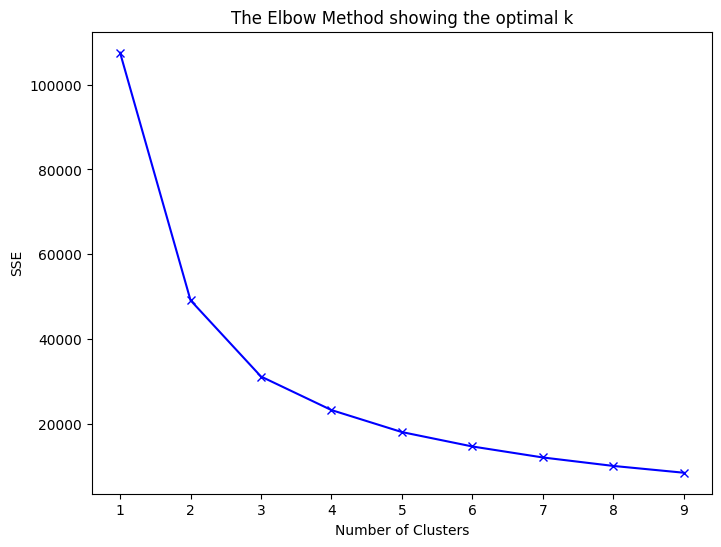

Optimal number of clusters: 3


In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Elbow method to determine the optimal number of clusters
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized_distance_matrix)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Find the elbow point
kl = KneeLocator(range(1, 10), distortions, curve="convex", direction="decreasing")
print("Optimal number of clusters:", kl.elbow)

In [9]:
from sklearn.cluster import KMeans

# Number of clusters
k = kl.elbow

# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the data
kmeans.fit(normalized_distance_matrix)

# Predict the clusters for each trace
clusters = kmeans.predict(normalized_distance_matrix)

/Users/mert2/.conda/envs/thesis/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Cluster Evaluation

In [10]:
# the value of the silhouette coefficient ranges between -1 and 1
# value close to 1 is considered as good

from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(normalized_distance_matrix, clusters)

print(f"Silhouette Coefficient: {silhouette_avg:.2f}")

Silhouette Coefficient: 0.51


# Token-Based Replay for Conformance Checking

In [11]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.bpmn.importer import importer as bpmn_importer
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments_petri

# 2. Import the given BPMN model
bpmn_graph = bpmn_importer.apply("MobisToBe.bpmn")

# 3. Convert the BPMN to a Petri net
net, im, fm = pm4py.convert_to_petri_net(bpmn_graph)

# 4. Perform alignment-based conformance checking
alignments = alignments_petri.apply(log, net, im, fm)

# Calculate and print diagnostics
fit_traces = sum(1 for trace in alignments if trace['fitness'] == 1.0)

print(f"Total traces: {len(log)}")
print(f"Conform traces: {fit_traces}")
print(f"Non-Conform traces: {len(log) - fit_traces}")

aligning log, completed variants ::   0%|          | 0/295 [00:00<?, ?it/s]

Total traces: 3354
Conform traces: 1690
Non-Conform traces: 1664


# Input Traces

In [12]:
trace1 = ['file travel request', 'check if travel request needs preliminary price inquiry', 'decide on approval requirements', 'check if booking is necessary', 'check if expense documents exist', 'upload travel expense documents', 'file travel expense report', 'confirm travel expense report', 'decide on travel expense approval', 'send original documents to archive', 'calculate payments', 'pay expenses']
trace2 = ['file travel request', 'check if travel request needs preliminary price inquiry', 'decide on approval requirements', 'check if booking is necessary', 'check if expense documents exist', 'file travel expense report', 'confirm travel expense report', 'decide on travel expense approval', 'send original documents to archive', 'calculate payments', 'pay expenses']
trace3 = ['file travel request', 'check if travel request needs preliminary price inquiry', 'decide on approval requirements', 'forward request to approver', 'decide on request', 'check if booking is necessary', 'check if expense documents exist', 'upload travel expense documents', 'file travel expense report', 'confirm travel expense report', 'decide on travel expense approval', 'send original documents to archive', 'calculate payments', 'pay expenses']

In [13]:
grouped = dataframe.groupby('@@case_index')['concept:name'].apply(list).reset_index(name='trace')

In [14]:
def is_happy_trace(row_trace):
    predefined_traces = [trace1, trace2, trace3]
    for trace in predefined_traces:
        if row_trace == trace:
            return 1
    return 0

In [15]:
grouped['happy'] = grouped['trace'].apply(is_happy_trace)
grouped

,@@case_index,trace,happy
0,0,"[file travel request, check if travel request ...",1
1,1,"[file travel request, check if travel request ...",0
2,2,"[file travel request, check if travel request ...",0
3,3,"[file travel request, check if travel request ...",0
4,4,"[file travel request, check if travel request ...",0
...,...,...,...
3349,3349,"[file travel request, check if travel request ...",1
3350,3350,"[file travel request, check if travel request ...",0
3351,3351,"[file travel request, check if travel request ...",1
3352,3352,"[file travel request, check if travel request ...",1


In [16]:
# Get indices of the happy traces in the results dataframe
happy_trace_indices = grouped[grouped['happy'] == 1].index.tolist()

# Extract the corresponding coordinates from the trace_representations array
happy_trace_coordinates = normalized_distance_matrix[happy_trace_indices]

# Extract unique coordinates
unique_happy_trace_coordinates = np.unique(happy_trace_coordinates, axis=0)

# Assuming the size of unique_happy_trace_coordinates is 3
#happy_trace1, happy_trace2, happy_trace3 = unique_happy_trace_coordinates
happy_trace1, happy_trace2, happy_trace3 = unique_happy_trace_coordinates

# Distance Measurement

In [17]:
from scipy.spatial.distance import euclidean

# Calculate the distances to each of the happy traces for every trace representation
distances_to_happy_traces = []

for trace_representation in normalized_distance_matrix:
    distances = [
        euclidean(trace_representation, happy_trace1),
        euclidean(trace_representation, happy_trace2),
        euclidean(trace_representation, happy_trace3)
    ]
    distances_to_happy_traces.append(distances)

# Calculate the average distance to the happy traces for each trace representation
avg_distances = [np.mean(distances) for distances in distances_to_happy_traces]

# Save the distances in a variable
avg_distances_var = np.array(avg_distances)

# Results overview

In [18]:
# create dataframe with necessary information for distance measurement

#grouped = dataframe.groupby('@@case_index')['concept:name'].apply(list).reset_index(name='trace')

results = pd.DataFrame(grouped['trace'])

results['cluster'] = clusters

conformity_array = [int(trace['fitness']) for trace in alignments]
results['conform'] = conformity_array

results['distance'] = avg_distances_var

results

,trace,cluster,conform,distance
0,"[file travel request, check if travel request ...",1,1,0.953165
1,"[file travel request, check if travel request ...",0,0,12.003067
2,"[file travel request, check if travel request ...",1,1,3.513680
3,"[file travel request, check if travel request ...",2,0,14.693019
4,"[file travel request, check if travel request ...",0,0,9.332383
...,...,...,...,...
3349,"[file travel request, check if travel request ...",1,1,1.100528
3350,"[file travel request, check if travel request ...",1,0,3.891528
3351,"[file travel request, check if travel request ...",1,1,1.172249
3352,"[file travel request, check if travel request ...",1,1,1.172249


In [19]:
summary = results.groupby('cluster').agg(
    count=pd.NamedAgg(column='trace', aggfunc='size'),
    conform_count=pd.NamedAgg(column='conform', aggfunc='sum')
).reset_index()

print("cluster\tcount\tconform_count")
for _, row in summary.iterrows():
    print(f"{row['cluster']}\t{row['count']}\t{row['conform_count']}")

cluster	count	conform_count
0	931	0
1	2225	1690
2	198	0


# Evaluation

/Users/mert2/.conda/envs/thesis/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


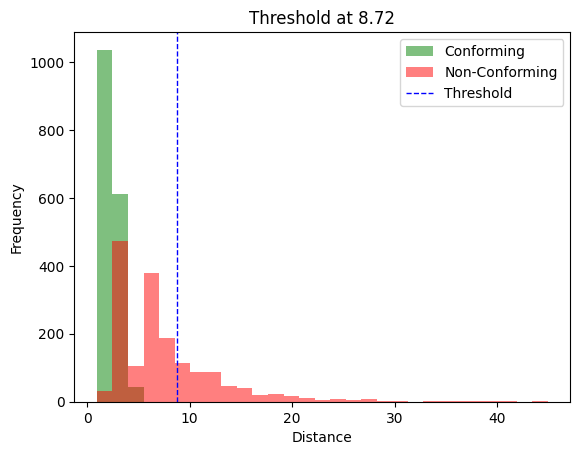

In [20]:
from sklearn.cluster import KMeans

# Filter the DataFrame into conforming and non-conforming subsets
conforming_distances = results[results['conform'] == 1]['distance']
non_conforming_distances = results[results['conform'] == 0]['distance']

# Determine common bin edges
min_distance = min(results['distance'])
max_distance = max(results['distance'])
bin_edges = np.linspace(min_distance, max_distance, num=30)

# Combine the data and reshape for k-means
all_distances = results['distance']
all_distances = np.array(all_distances)
all_distances_reshaped = all_distances.reshape(-1, 1)

# Apply k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(all_distances_reshaped)
kmeans_labels = kmeans.labels_

# Find the threshold as the average of the two cluster centers
threshold_value = np.mean(kmeans.cluster_centers_)

# Plot histograms and the threshold
plt.hist(conforming_distances, bins=bin_edges, alpha=0.5, label='Conforming', color='green')
plt.hist(non_conforming_distances, bins=bin_edges, alpha=0.5, label='Non-Conforming', color='red')
plt.axvline(threshold_value, color='blue', linestyle='dashed', linewidth=1, label='Threshold')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title(f'Threshold at {threshold_value:.2f}')
plt.show()

In [21]:
true_positive = np.sum(results[results['conform'] == 1]['distance'] < threshold_value)
true_negative = np.sum(results[results['conform'] == 0]['distance'] > threshold_value)
false_positive = np.sum(results[results['conform'] == 0]['distance'] < threshold_value)
false_negative = np.sum(results[results['conform'] == 1]['distance'] > threshold_value)

In [22]:
# Calculate accuracy
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.645


In [23]:
# Calculate precision
precision = true_positive / (true_positive + false_positive)
print(f"Precision: {precision:.3f}")

Precision: 0.587


In [24]:
# Calculate recall
recall = true_positive / (true_positive + false_negative)
print(f"Recall: {recall:.3f}")

Recall: 1.000


In [25]:
# Calculate f1
f1 = 2 * ((precision * recall) / (precision + recall))
print(f"F1: {f1:.3f}")

F1: 0.740


# Dev (Non Conform Traces)

In [26]:
# Calculate precision
precision = true_negative / (true_negative + false_negative)
print(f"Precision: {precision:.3f}")

Precision: 1.000


In [27]:
# Calculate recall
recall = true_negative / (true_negative + false_positive)
print(f"Recall: {recall:.3f}")

Recall: 0.285


# No Dev (Conform Traces)

In [28]:
# Calculate precision
precision = true_positive / (true_positive + false_positive)
print(f"Precision: {precision:.3f}")

Precision: 0.587


In [29]:
# Calculate recall
recall = true_positive / (true_positive + false_negative)
print(f"Recall: {recall:.3f}")

Recall: 1.000


# AUC_ROC

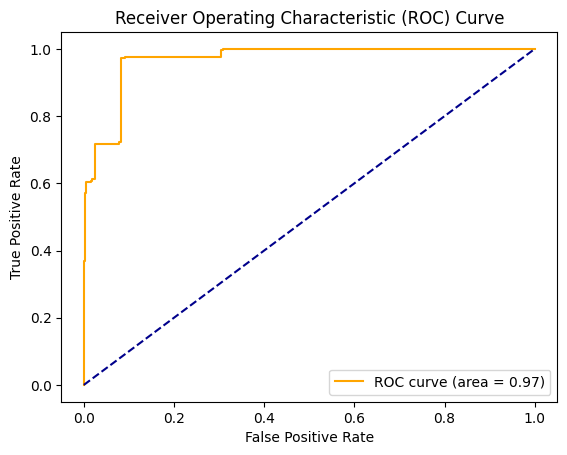

ROC AUC: 0.968


In [30]:
# UPDATED

import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming 'results' is your DataFrame and 'distance' is the score to predict conformity

# Inverting the 'distance' scores because higher scores indicate non-conformity
# We invert the scores for ROC AUC calculation because roc_auc_score expects higher values
# to indicate higher likelihood of the positive class
inverted_scores = 1 - results['distance']

# Calculate the ROC curve and AUC using inverted scores
fpr, tpr, thresholds = roc_curve(results['conform'], inverted_scores, pos_label=1)
roc_auc = roc_auc_score(results['conform'], inverted_scores)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC
print(f"ROC AUC: {roc_auc:.3f}")